In [2]:
%matplotlib inline

import matplotlib
import pandas as pd
import numpy as np

import datetime 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [3]:
raw_z_df = pd.read_csv("Zooplankton Abundances.csv", engine='python')

In [4]:
# what each column represents: https://oceaninformatics.ucsd.edu/datazoo/catalogs/pallter/datasets/150/datatables/150
# 
z_df = raw_z_df.copy()
z_df.columns

Index(['studyname', 'col_2631', 'col_2632', 'col_2630', 'col_2633', 'col_2634',
       'col_2635', 'col_2636', 'col_2637', 'col_2638', 'col_2639', 'col_2640',
       'col_2641', 'col_2642'],
      dtype='object')

In [5]:
# Processing column

z_df['Year'] = pd.to_datetime(z_df['col_2631'], format='%Y')
z_df['Latitude'] = z_df['col_2635']
z_df['Longitude'] = z_df['col_2636']
z_df['Krill'] = z_df['col_2637']
z_df['Salp'] = z_df['col_2638']
z_df['Thy'] = z_df['col_2639']
z_df['Limacina'] = z_df['col_2640']
z_df['Ecrystallorophias'] = z_df['col_2641']

z_df['Krill'] = z_df['Krill'].clip(lower=0)
z_df['Salp'] = z_df['Salp'].clip(lower=0)
z_df['Thy'] = z_df['Thy'].clip(lower=0)
z_df['Limacina'] = z_df['Limacina'].clip(lower=0)
z_df['Ecrystallorophias'] = z_df['Ecrystallorophias'].clip(lower=0)
z_df['Total Food'] = z_df['Krill'] + z_df['Salp'] + z_df['Thy'] + z_df['Limacina'] + z_df['Ecrystallorophias']

# Limacina: sea snail babies, on penguin diet: https://en.wikipedia.org/wiki/Sea_butterfly
# E crystallorophias: antarctic costal krill: https://en.wikipedia.org/wiki/Euphausia_crystallorophias
# Thysanoessa, a genre of krill: https://en.wikipedia.org/wiki/Thysanoessa
# Since `Krill`, `E crystallorophias` and `Thysanoessa` are all under the umbrella of krill,
# we can just group krill together. And create a Krill and other separation
z_df['All Krills'] = z_df['Krill'] + z_df['Thy'] +  z_df['Ecrystallorophias']
z_df['All Other'] = z_df['Salp'] + z_df['Limacina']

del z_df['col_2630']
del z_df['col_2631']
del z_df['col_2632']
del z_df['col_2633']
del z_df['col_2634']
del z_df['col_2635']
del z_df['col_2636']
del z_df['col_2637']
del z_df['col_2638']
del z_df['col_2639']
del z_df['col_2640']
del z_df['col_2641']
del z_df['col_2642']

In [6]:
z_df.describe()

,Latitude,Longitude,Krill,Salp,Thy,Limacina,Ecrystallorophias,Total Food,All Krills,All Other
count,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000,635.000000
mean,-65.756860,-68.096255,98.915685,30.857339,188.998819,50.468016,14.352252,383.592110,302.266756,81.325354
std,1.079899,2.429219,577.830226,120.824925,538.686442,89.916916,69.925090,787.895565,782.829140,152.242068
min,-68.167300,-73.065200,0.000000,0.000000,0.000000,0.000000,0.000000,0.180000,0.000000,0.000000
25%,-66.573550,-69.901900,1.020000,0.000000,6.175000,0.510000,0.000000,72.020000,23.705000,2.320000
50%,-65.626800,-67.995500,7.660000,0.090000,44.200000,15.600000,0.000000,183.900000,98.970000,30.370000
75%,-64.865300,-66.258200,29.510000,10.190000,182.610000,60.695000,1.080000,427.165000,307.780000,100.835000
max,-63.591100,-63.723200,9900.860000,1576.710000,8414.360000,932.200000,1046.740000,9900.860000,9900.860000,1631.930000


In [8]:
z_df.groupby(z_df['Year'].dt.year).count()

,studyname,Year,Latitude,Longitude,Krill,Salp,Thy,Limacina,Ecrystallorophias,Total Food,All Krills,All Other
Year,,,,,,,,,,,,
1993,43,43,43,43,43,43,43,43,43,43,43,43
1994,56,56,56,56,56,56,56,56,56,56,56,56
1995,59,59,59,59,59,59,59,59,59,59,59,59
1996,66,66,66,66,66,66,66,66,66,66,66,66
1997,71,71,71,71,71,71,71,71,71,71,71,71
1998,55,55,55,55,55,55,55,55,55,55,55,55
1999,77,77,77,77,77,77,77,77,77,77,77,77
2000,47,47,47,47,47,47,47,47,47,47,47,47
2001,49,49,49,49,49,49,49,49,49,49,49,49


In [6]:
counts_per_year = z_df.groupby(z_df['Year'].dt.year)[
    'Krill', 'Salp', 'Thy', 'Limacina', 'Ecrystallorophias', 'All Krills', 'All Other', 'Total Food'
].sum()

<ipython-input-6-9c9f07d80dbb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  counts_per_year = z_df.groupby(z_df['Year'].dt.year)[


In [7]:
counts_per_year

,Krill,Salp,Thy,Limacina,Ecrystallorophias,All Krills,All Other,Total Food
Year,,,,,,,,
1993,16294.06,44.19,5148.26,213.56,574.83,22017.15,257.75,22274.90
1994,1553.30,3296.83,33567.96,385.69,1290.33,36411.59,3682.52,40094.11
1995,425.25,10.19,12992.99,1479.62,278.73,13696.97,1489.81,15186.78
1996,8387.86,24.25,15483.57,6046.07,1737.31,25608.74,6070.32,31679.06
1997,8891.09,2734.81,13657.91,2599.03,506.48,23055.48,5333.84,28389.32
1998,12263.44,6.14,10728.99,86.22,105.13,23097.56,92.36,23189.92
1999,2014.20,7203.42,5587.70,4411.70,261.68,7863.58,11615.12,19478.70
2000,587.32,3903.78,2291.71,2568.50,573.73,3452.76,6472.28,9925.04
2001,504.19,594.07,3814.39,2337.72,17.49,4336.07,2931.79,7267.86


Text(0.5, 1.0, 'Abundance(num/1000m³) of each kind of food per year ')

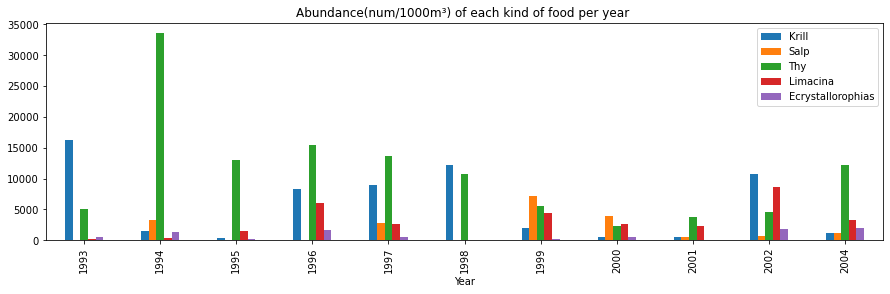

In [8]:

counts_per_year[['Krill', 'Salp', 'Thy', 'Limacina', 'Ecrystallorophias']].plot.bar(figsize=(15,4))
plt.title("Abundance(num/1000m³) of each kind of food per year ")

Text(0.5, 1.0, 'Abundance(num/1000m³) of Krill vs Other food sources per year ')

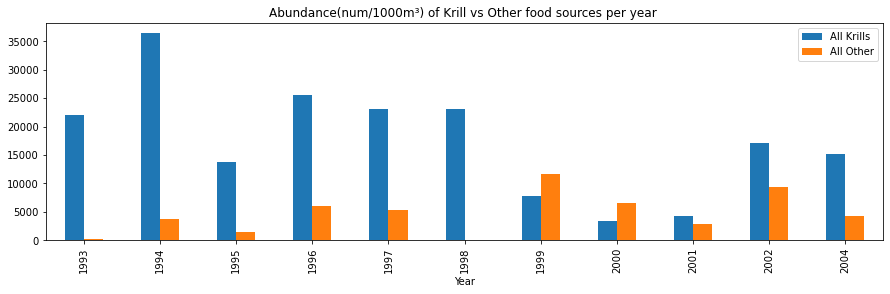

In [9]:
 
counts_per_year[['All Krills', 'All Other']].plot.bar(figsize=(15,4))
plt.title("Abundance(num/1000m³) of Krill vs Other food sources per year ")

Text(0.5, 1.0, 'Abundance(num/1000m³) of total food sources per year ')

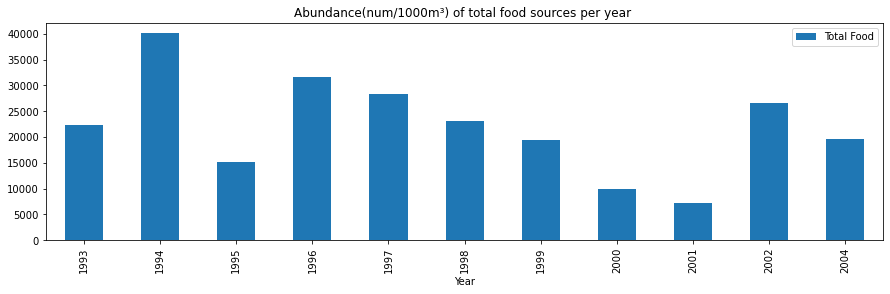

In [10]:
# We can see the total food abundance change through the years 
 
counts_per_year[['Total Food']].plot.bar(figsize=(15,4))
plt.title("Abundance(num/1000m³) of total food sources per year ")